# Data Exploration

In [1]:
import numpy as np
import pandas as pd
from MemoryAutoScaling import TraceAnalyzer

In [2]:
DATA_PATH = "/Users/mattb/Desktop/Courses/MemoryAutoScaling/data/task_usage_df"

df_1298 = pd.read_csv("{}1298.csv".format(DATA_PATH)).drop(columns=['Unnamed: 0'])
df_1925 = pd.read_csv("{}1925.csv".format(DATA_PATH)).drop(columns=['Unnamed: 0'])

In [3]:
order = df_1298['start_time'].sort_values().index
df_1298 = df_1298.loc[order]

order = df_1925['start_time'].sort_values().index
df_1925 = df_1925.loc[order]

In [4]:
avg_1298 = df_1298['average_usage.memory'].to_numpy()
avg_1298[np.isnan(avg_1298)] = 0

avg_1925 = df_1925['average_usage.memory'].to_numpy()
avg_1925[np.isnan(avg_1925)] = 0

max_1298 = df_1298['maximum_usage.memory'].to_numpy()
max_1298[np.isnan(max_1298)] = 0

max_1925 = df_1925['maximum_usage.memory'].to_numpy()
max_1925[np.isnan(max_1925)] = 0

### Analyzing Raw Traces

In this section we analyze the raw trace data before applying any transformations. We first look at the average usage data.

##### Average Usage

In [5]:
analyzer = TraceAnalyzer("whitegrid", "seaborn-dark", 10, "blue", "Raw Data")

In [6]:
print("Trace 1298 Average Memory Usage Statistics")
analyzer.calculate_statistics(avg_1298)

Trace 1298 Average Memory Usage Statistics


std       0.001717
range     0.019775
IQR       0.001099
median    0.017975
avg       0.017768
dtype: float64

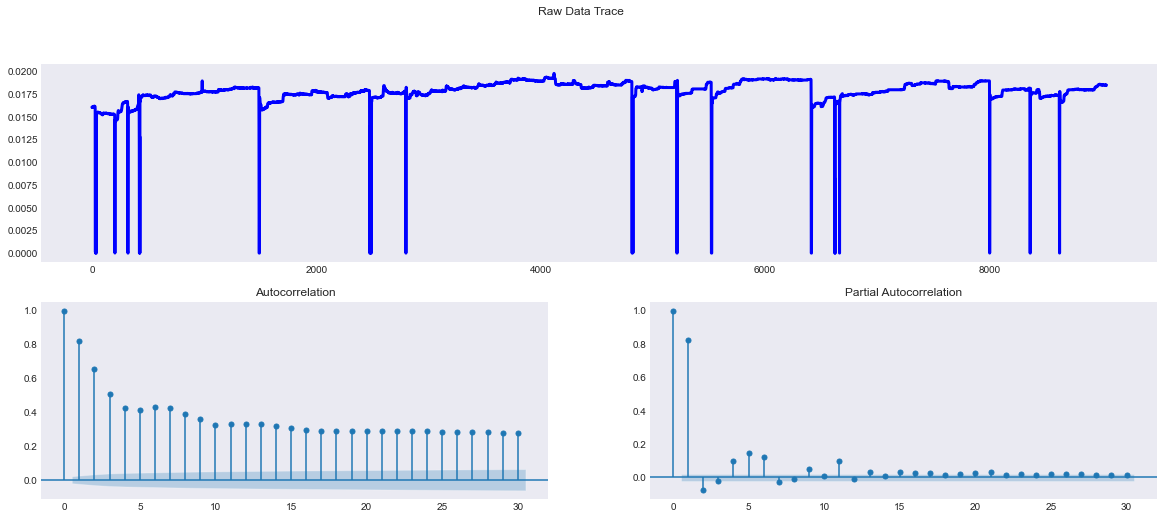

In [7]:
analyzer.plot_auto_correlations(avg_1298, 30)

In [8]:
print("Trace 1925 Average Memory Usage Statistics")
analyzer.calculate_statistics(avg_1925)

Trace 1925 Average Memory Usage Statistics


std       0.000143
range     0.000726
IQR       0.000072
median    0.000059
avg       0.000090
dtype: float64

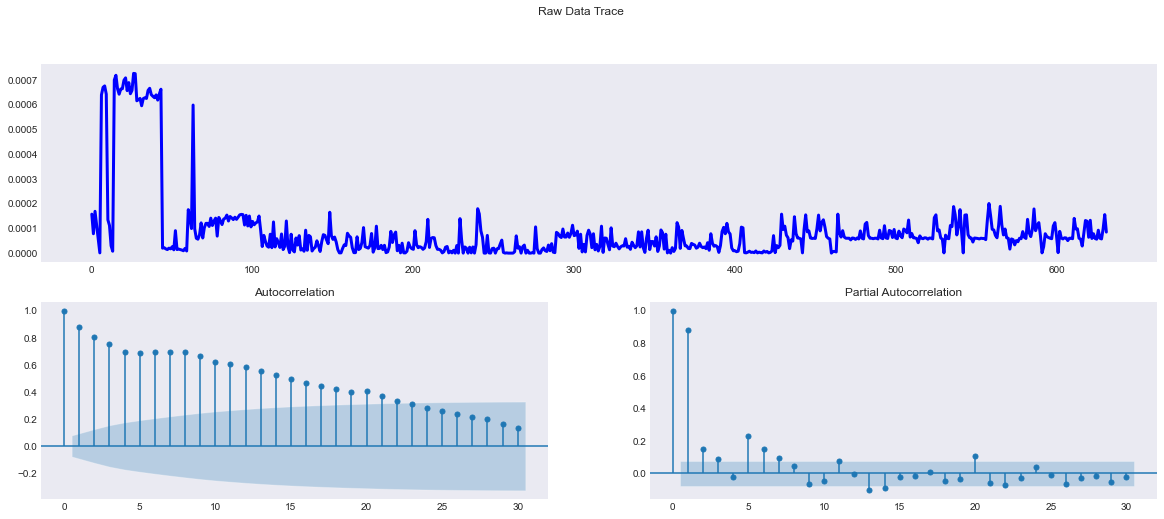

In [9]:
analyzer.plot_auto_correlations(avg_1925, 30)

##### Maximum Usage

In [10]:
print("Trace 1298 Maximum Memory Usage Statistics")
analyzer.calculate_statistics(max_1298)

Trace 1298 Maximum Memory Usage Statistics


std       0.001689
range     0.019989
IQR       0.001068
median    0.017975
avg       0.017800
dtype: float64

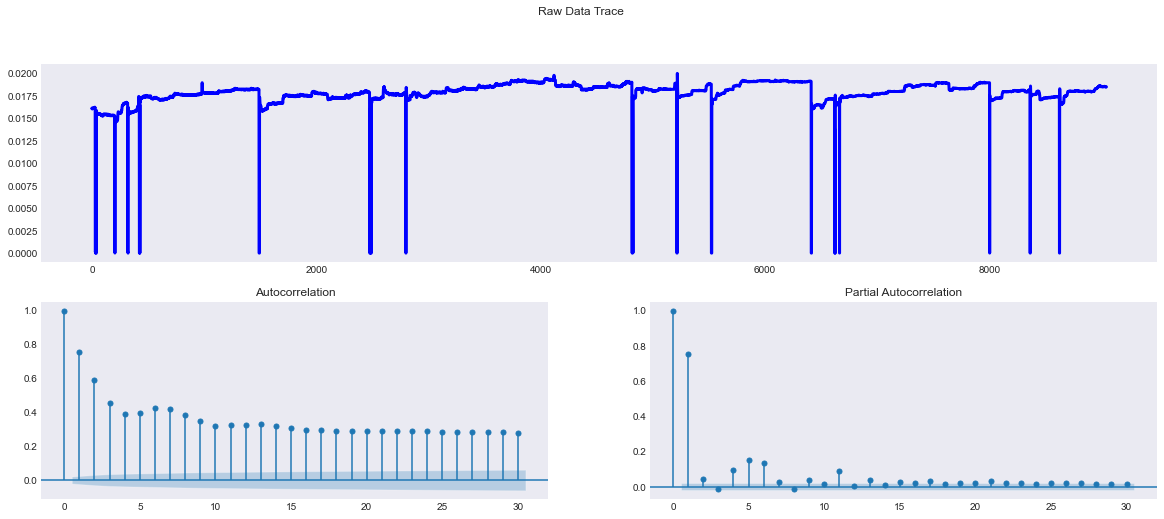

In [11]:
analyzer.plot_auto_correlations(max_1298, 30)

In [13]:
print("Trace 1925 Maximum Memory Usage Statistics")
analyzer.calculate_statistics(max_1925)

Trace 1925 Maximum Memory Usage Statistics


std       0.000209
range     0.001310
IQR       0.000159
median    0.000097
avg       0.000187
dtype: float64

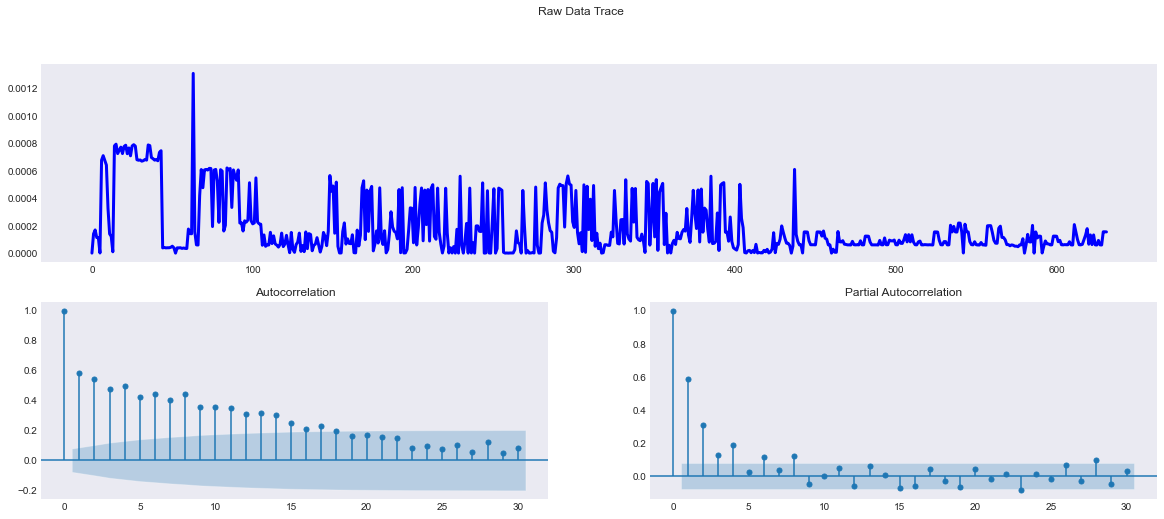

In [14]:
analyzer.plot_auto_correlations(max_1925, 30)

### Differenced Traces

In [15]:
def get_differenced_stats(raw_trace, diffs, trace_analyzer):
    return pd.DataFrame({"Raw": trace_analyzer.calculate_statistics(raw_trace),
                         "Differenced": trace_analyzer.calculate_statistics(diffs)})

##### Average Usage

In [16]:
print("Trace 1298 Average Memory Usage Statistics")
get_differenced_stats(avg_1298, np.diff(avg_1298, 1), analyzer)

Trace 1298 Average Memory Usage Statistics


,Raw,Differenced
std,0.001717,1.021312e-03
range,0.019775,3.513050e-02
IQR,0.001099,0.000000e+00
median,0.017975,0.000000e+00
avg,0.017768,2.700073e-07


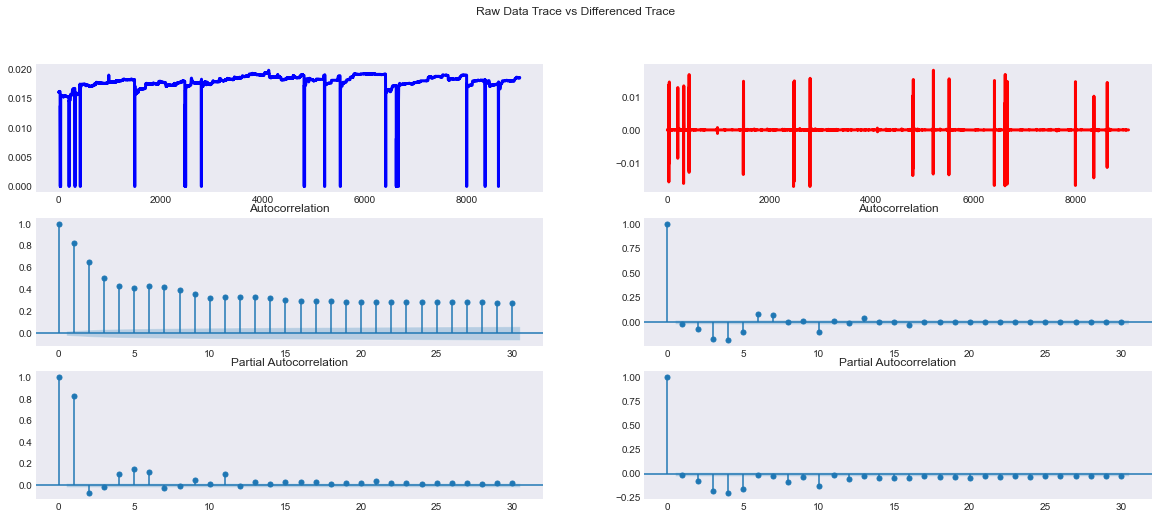

In [17]:
analyzer.plot_differenced_auto_correlations(avg_1298, 30)

In [19]:
print("Trace 1925 Average Memory Usage Statistics")
get_differenced_stats(avg_1925, np.diff(avg_1925, 1), analyzer)

Trace 1925 Average Memory Usage Statistics


,Raw,Differenced
std,0.000143,7.039813e-05
range,0.000726,1.333237e-03
IQR,0.000072,3.862381e-05
median,0.000059,-1.907349e-06
avg,0.000090,-1.148641e-07


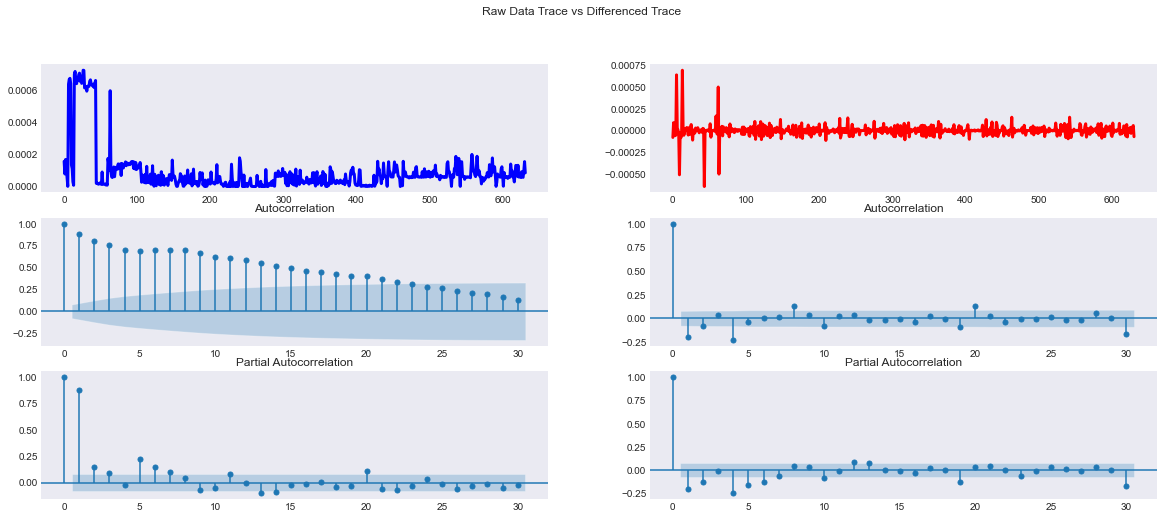

In [20]:
analyzer.plot_differenced_auto_correlations(avg_1925, 30)

##### Maximum Usage

In [21]:
print("Trace 1298 Maximum Memory Usage Statistics")
get_differenced_stats(max_1298, np.diff(max_1298, 1), analyzer)

Trace 1298 Maximum Memory Usage Statistics


,Raw,Differenced
std,0.001689,1.182617e-03
range,0.019989,3.908157e-02
IQR,0.001068,0.000000e+00
median,0.017975,0.000000e+00
avg,0.017800,2.666322e-07


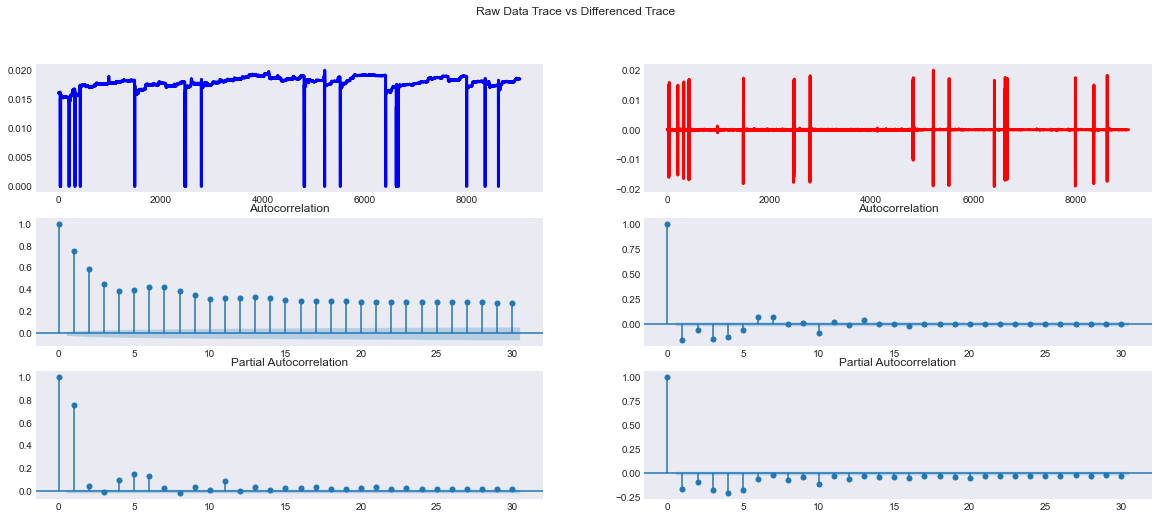

In [22]:
analyzer.plot_differenced_auto_correlations(max_1298, 30)

In [23]:
print("Trace 1925 Maximum Memory Usage Statistics")
get_differenced_stats(max_1925, np.diff(max_1925, 1), analyzer)

Trace 1925 Maximum Memory Usage Statistics


,Raw,Differenced
std,0.000209,1.905894e-04
range,0.001310,2.325058e-03
IQR,0.000159,8.869171e-05
median,0.000097,-9.536743e-07
avg,0.000187,2.448419e-07


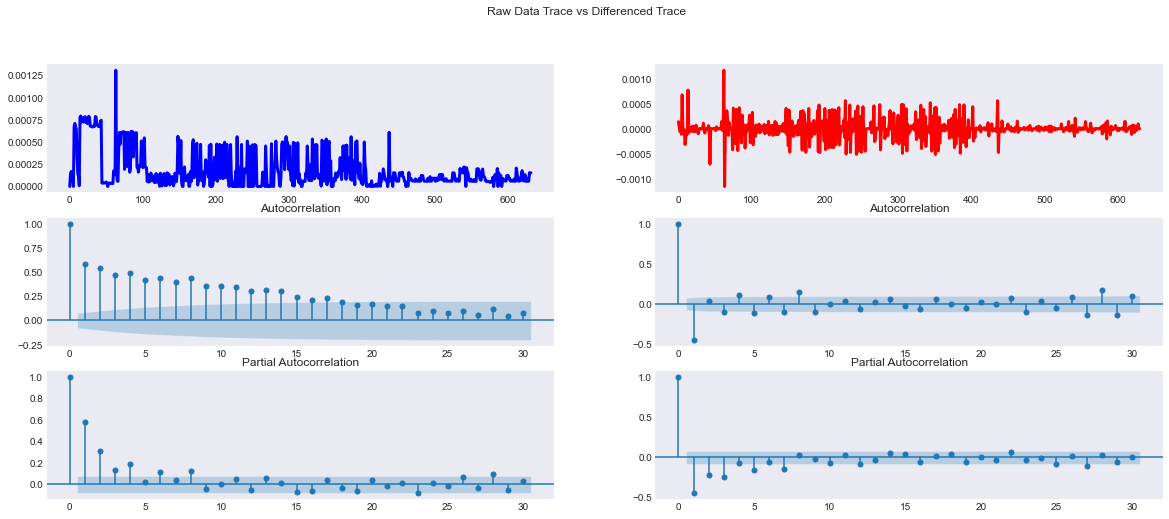

In [24]:
analyzer.plot_differenced_auto_correlations(max_1925, 30)